# Sigmoid Neuron

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error

from tqdm.notebook import tqdm

## Plotting Sigmoid function

$$
S_{w,b}(x)=\frac{1}{1+e^{-(wx + b)}}
$$

In [3]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(np.dot(w,x) + b)))

In [4]:
sigmoid(1, 0.5, 0)

0.6224593312018546

## Plotting Sigmoid function in 2D

In [5]:
w = -0.5
b = 0.1
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

In [6]:
type(Y)

numpy.ndarray

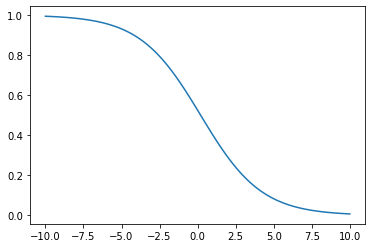

In [7]:
plt.plot(X, Y)
plt.show()

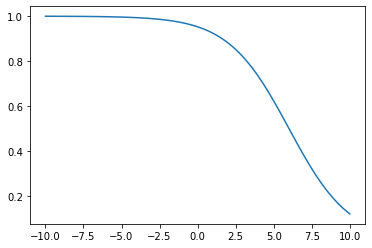

In [8]:
w = -0.5
b = 3
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

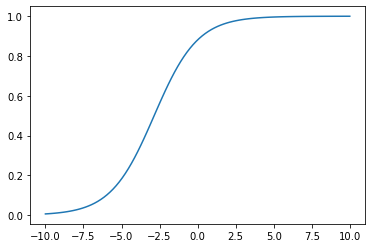

In [9]:
w = 0.7
b = 2
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

## Plotting Sigmoid function as 3D Plot

$$
S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^{-(w_1x_1 + w_2x_2 + b)}}
$$

In [10]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(np.dot(w1,x1) + np.dot(w2, x2) + b)))

In [11]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [12]:
from mpl_toolkits import mplot3d

In [13]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape)
print(XX1.shape)


(100,)
(100, 100)


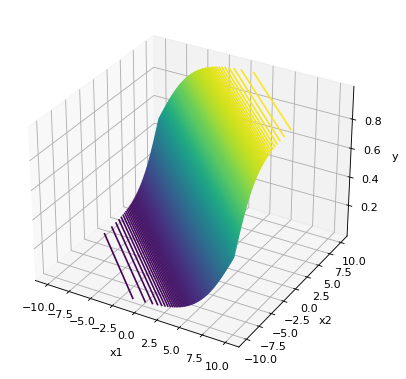

In [14]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 300)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

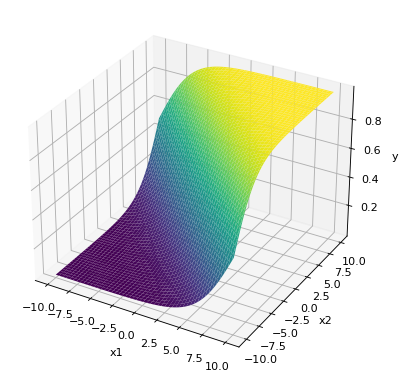

In [15]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

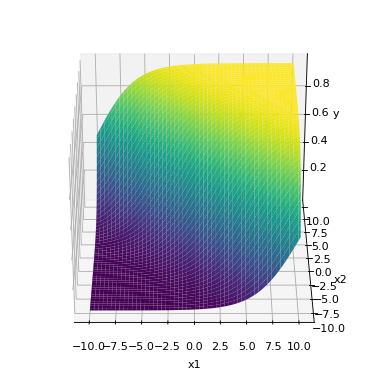

In [16]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)

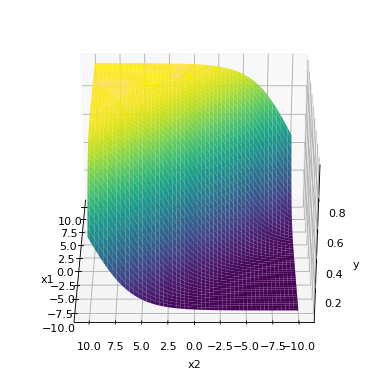

In [17]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180)

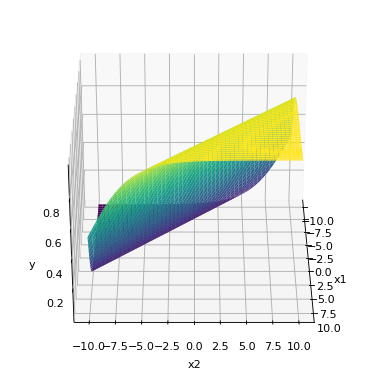

In [18]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 0)

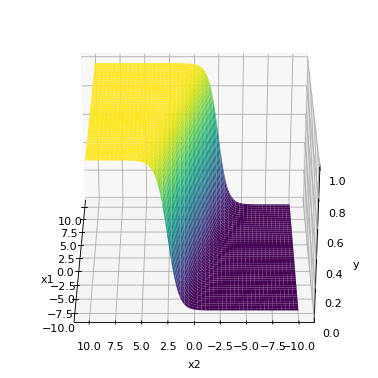

In [19]:
w1 = 0.5
w2 = 2 # here X2 is dominating contributor to Y
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180)

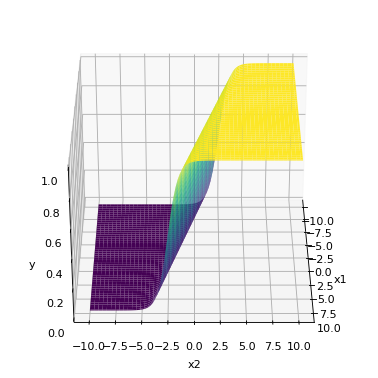

In [20]:
w1 = 0.5
w2 = 2 # here X2 is dominating contributor to Y
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 0)

Text(0.5, 0, 'y')

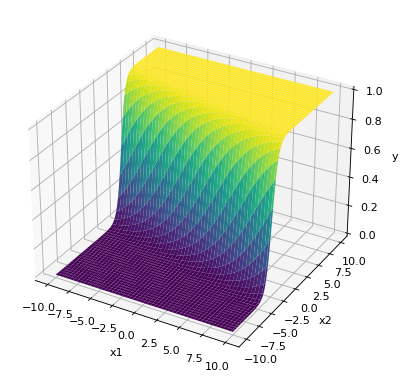

In [21]:
w1 = 0.5
w2 = 2 # here X2 is dominating contributor to Y
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


## Compute Loss

In [22]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

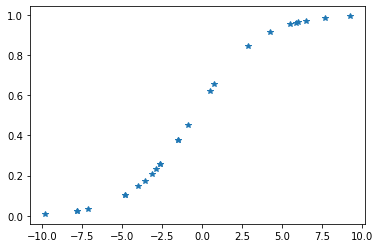

In [23]:
plt.plot(X, Y, '*')
plt.show()

In [24]:
def calculate_loss(X, Y, estimates_w, estimate_b):
    loss = 0 
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, estimates_w, estimate_b)) ** 2
    
    return loss

In [25]:
w = np.linspace(0, 2, 100)
b = np.linspace(-1, 1, 100)

W, B = np.meshgrid(w, b)
loss = calculate_loss(X, Y, W, B) # broadcasting of w & b

In [26]:
loss.shape

(100, 100)

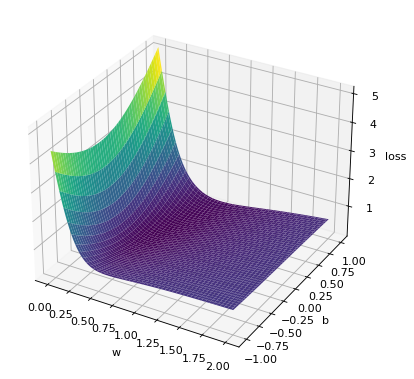

In [27]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
plt.show()

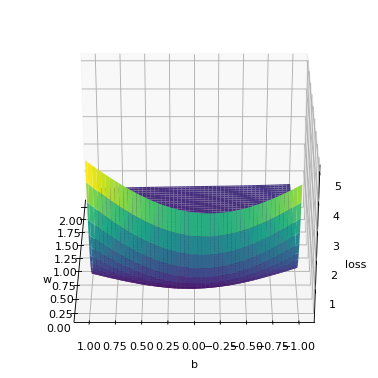

In [28]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.view_init(30, 180)

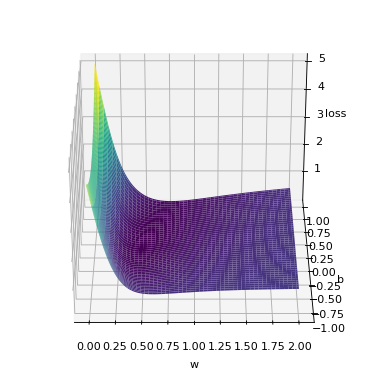

In [29]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.view_init(30, 270)

In [30]:
# after flatting all rows & column
ij = np.argmin(loss)
print(ij)

6225


In [31]:
i = np.floor(ij / loss.shape[1])
j = ij - i * loss.shape[1]

In [32]:
print(i, j)

62.0 25.0


In [33]:
i = int(i)
j = int(j)

In [34]:
loss[i, j]

6.0016295483390884e-05

In [35]:
W[i, j]

0.5050505050505051

In [36]:
B[i, j]

0.2525252525252526

## Contour Plot

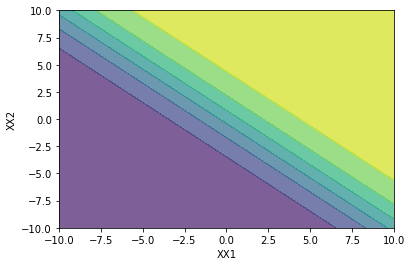

In [37]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

plt.contourf(XX1, XX2, Y, alpha=0.7) # Each value of Y is shown as color
plt.xlabel('XX1')
plt.ylabel('XX2')
plt.show()

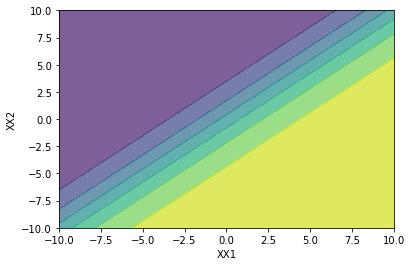

In [38]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

w1 = 0.5
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

plt.contourf(XX1, XX2, Y, alpha=0.7) # Each value of Y is shown as color
plt.xlabel('XX1')
plt.ylabel('XX2')
plt.show()

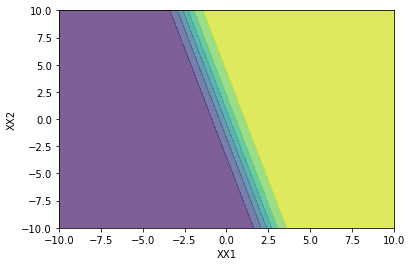

In [39]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

w1 = 2
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

plt.contourf(XX1, XX2, Y, alpha=0.7) # Each value of Y is shown as color
plt.xlabel('XX1')
plt.ylabel('XX2')
plt.show()

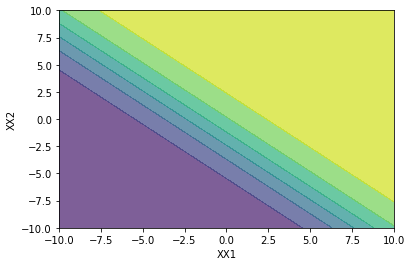

In [40]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

w1 = 0.5
w2 = 0.5
b = 1
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

plt.contourf(XX1, XX2, Y, alpha=0.7) # Each value of Y is shown as color
plt.xlabel('XX1')
plt.ylabel('XX2')
plt.show()

## Sigmoid Neuron Class

In [96]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1.0 / (1.0 + np.exp(-(np.dot(x, self.w.T) + self.b)))
    
    def grad_w(self, x, y):
        y_pred = self.model(x)
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.model(x)
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):

        if display_loss:
            loss = {}
        
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        for i in tqdm(range(epochs), total=epochs, unit="epochs"):
            delta_w = 0
            delta_b = 0
            
            for x, y in zip(X, Y):
                delta_w += self.grad_w(x, y)
                delta_b += self.grad_b(x, y)
                
            self.w -= learning_rate * delta_w
            self.b -= learning_rate * delta_b
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.model(x)
            Y_pred.append(y_pred)
            
        return np.array(Y_pred)
            

## Fit for toy data

In [97]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

s = SigmoidNeuron()
s.fit(X, Y, 1, 0.25, True)

  0%|          | 0/1 [00:00<?, ?epochs/s]

In [98]:
print(s.w, s.b)

[[ 0.52323093 -0.16647319]] [-0.01587943]


In [99]:
# learn without initilizing & external epochs
s.fit(X, Y, 1, 0.25, True)
for i in range(20):
    print(s.w, s.b)
    s.fit(X, Y, 1, 0.25, False)

  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.34208619 -0.58059167]] [-0.02831379]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.3945032  -0.50433087]] [-0.0545984]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.4223989  -0.48780736]] [-0.07864259]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.44337612 -0.48817481]] [-0.10174622]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.46216349 -0.49249281]] [-0.12388627]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.47989932 -0.49765323]] [-0.14507539]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.49689593 -0.5028974 ]] [-0.1653628]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.51326473 -0.5080351 ]] [-0.18480467]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.52906317 -0.51302126]] [-0.20345551]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.54433179 -0.51784974]] [-0.22136613]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.55910427 -0.52252508]] [-0.23858344]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.5734105  -0.52705458]] [-0.2551506]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.58727764 -0.53144599]] [-0.27110735]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.6007306  -0.53570678]] [-0.2864903]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.61379233 -0.53984401]] [-0.30133317]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.626484   -0.54386426]] [-0.31566713]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.63882523 -0.54777363]] [-0.32952095]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.65083416 -0.55157781]] [-0.34292127]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.66252766 -0.5552821 ]] [-0.35589277]


  0%|          | 0/1 [00:00<?, ?epochs/s]

[[ 1.67392137 -0.5588914 ]] [-0.36845833]


  0%|          | 0/1 [00:00<?, ?epochs/s]

In [45]:
def sn_plot(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.model(val)
    
    ax.contourf(XX1, XX2, YY, cmap='viridis')
    ax.scatter(X[:,0], X[:,1], c=Y)
    ax.plot()

/var/folders/qw/f1qj8jld7cqbh8qrv_zfk9kr0000gn/T/xpython_29209/2618216962.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epochs"):


  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

  0%|          | 0/1 [00:00<?, ?epochs/s]

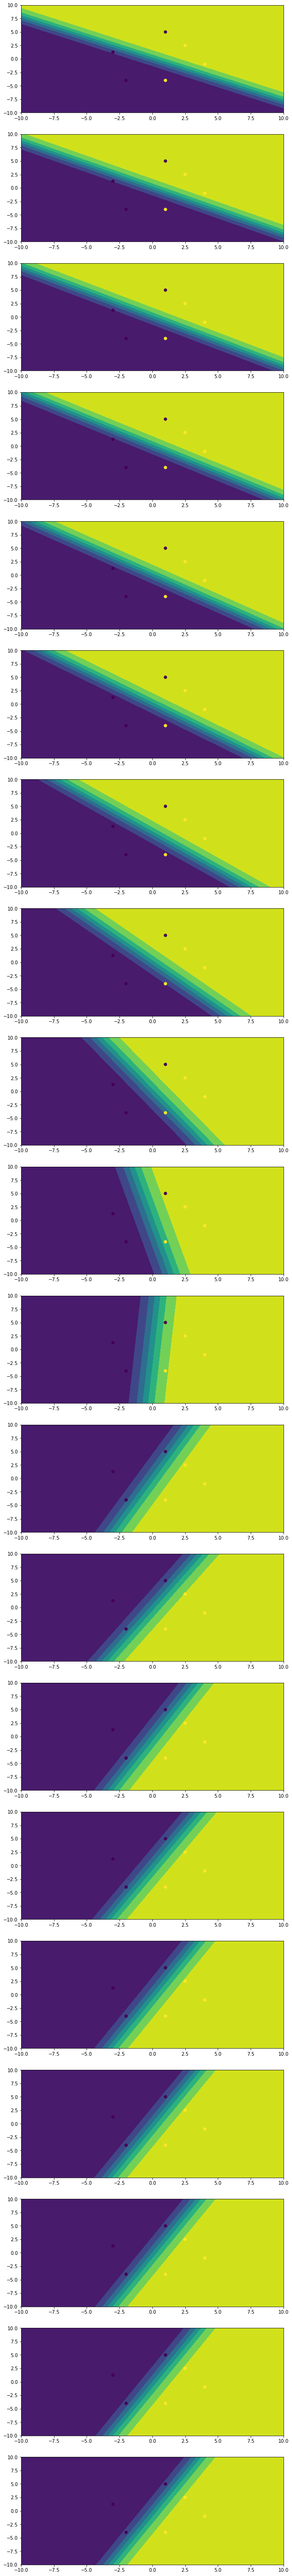

In [46]:
# learn without initilizing & external epochs
s = SigmoidNeuron()
s.fit(X, Y, 1, 0.025, True)
N = 20
plt.figure(figsize=(10, N * 5))

for i in range(N):
    ax = plt.subplot(N, 1, i+1)
    s.fit(X, Y, 1, 0.5, False)
    sn_plot(X, Y, s, ax)


# Load data from CSV

In [47]:
data = pd.read_csv('mobile_cleaned.csv')

In [48]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [49]:
data.shape

(341, 88)

In [50]:
X = data.drop('Rating', axis=1)
Y = data['Rating'].values

In [51]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [52]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [53]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(int)

In [54]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,1,0,0,0,1,4.4,1


In [55]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [56]:
Y_binarised = data['Class'].values

## Data Standarisation

In [57]:
R = np.random.random([100, 1])

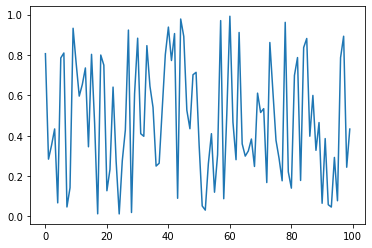

In [58]:
plt.plot(R)
plt.show()

In [59]:
np.mean(R)

0.4792209970724582

In [60]:
np.std(R)

0.2913298679621768

In [61]:
scaler = StandardScaler()


In [62]:
scaler.fit(R)

StandardScaler()

In [63]:
scaler.mean_

array([0.479221])

In [64]:
RT = scaler.transform(R)

In [65]:
RT.mean()

1.201816424156732e-16

In [66]:
RT.std()

1.0

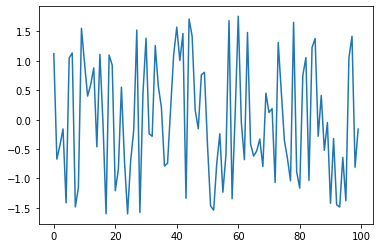

In [67]:
plt.plot(RT)
plt.show()

## Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y_binarised, random_state=0)

In [70]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


Fit i.e learn about scaling on Train data and use same mean/std to transform on test data

In [71]:
scaler = StandardScaler()

In [72]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [73]:
minmax_scaler = MinMaxScaler()

In [74]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

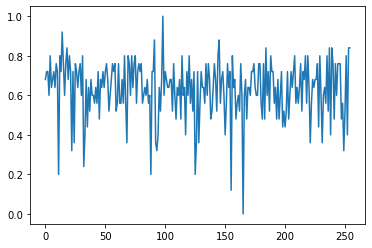

In [75]:
plt.plot(Y_scaled_train)
plt.show()

In [76]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

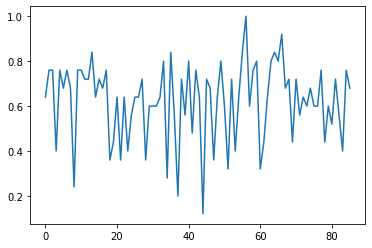

In [77]:
plt.plot(Y_scaled_test)
plt.show()

In [78]:
scaled_threshold = list(minmax_scaler.transform(np.asarray([threshold]).reshape(-1,1)))[0][0]

In [79]:
scaled_threshold

0.6800000000000002

In [80]:
Y_binarised_scaled_train = (Y_scaled_train > scaled_threshold).astype(int).ravel() # ravel used to flatten it

In [81]:
Y_binarised_scaled_test = (Y_scaled_test > scaled_threshold).astype(int).ravel()

In [82]:
Y_binarised_scaled_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

## Apply Sigmoid Neuron to Processed Data

  0%|          | 0/50000 [00:00<?, ?epochs/s]

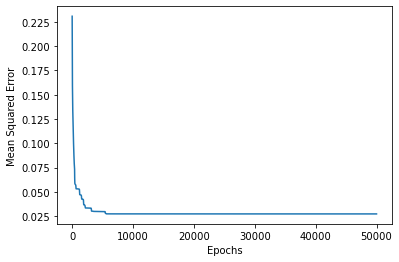

In [105]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=50000, learning_rate=0.01, display_loss=True)

In [106]:
Y_pred_test = sn.predict(X_scaled_test)
Y_pred_train = sn.predict(X_scaled_train)

In [107]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype(int).ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype(int).ravel()

In [108]:
print("Train accuracy :",accuracy_score(Y_pred_binarised_train, Y_binarised_scaled_train))

Train accuracy : 0.8235294117647058


In [109]:
print("Train accuracy :",accuracy_score(Y_pred_binarised_test, Y_binarised_scaled_test))

Train accuracy : 0.813953488372093
